<a href="https://colab.research.google.com/github/RupeshSharma14/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing the libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

In [2]:
# Configuration for matplotlib graphs

matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (13, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid');

In [3]:
# Mounting the google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading the dataset in pandas 

path = "/content/drive/MyDrive/Bike Sharing Demand Prediction/SeoulBikeData.csv"
bike_df = pd.read_csv(path, encoding = "latin")

In [5]:
# Displaying the dataset

bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# Size of the data

bike_df.shape

(8760, 14)

In [7]:
# Check for duplicate data

bike_df.duplicated().sum()

0

In [8]:
# Check for NULL values

bike_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [9]:
# Check for data types

bike_df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object



> **Date is an object data type. We should convert it into datetime datatype.**



In [10]:
# Converting the data type of "Date" column to datetime object

bike_df["Date"] = bike_df["Date"].astype("datetime64")

In [11]:
# bike_df['year'] = bike_df['Date'].dt.year

# bike_df['month'] = bike_df['Date'].dt.month

# bike_df['day'] = bike_df['Date'].dt.day

In [12]:
# Dropping "Date" column

bike_df.drop(columns = "Date", inplace = True)

In [13]:
# Descriptive summary of the dataset

bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# **Exploratory Data Analysis**

### **Univariate Analysis**

**1. Dependent Variable**

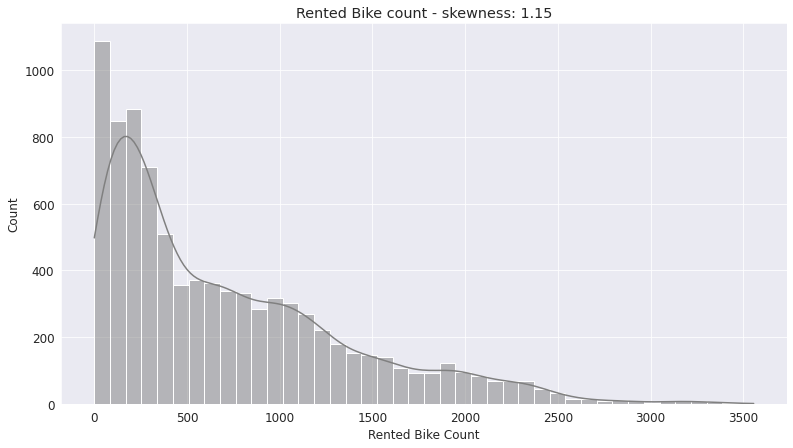

In [14]:
# Distribution of Dependent Variable

sns.histplot(bike_df["Rented Bike Count"], kde = "True", color = "grey")
plt.title("Rented Bike count - skewness: " + str(round(bike_df["Rented Bike Count"].skew(), 2))) 
plt.show()



> **The dependent variable is moderately right skewed.**



**2. Numerical variables**

In [15]:
numeric_features = bike_df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

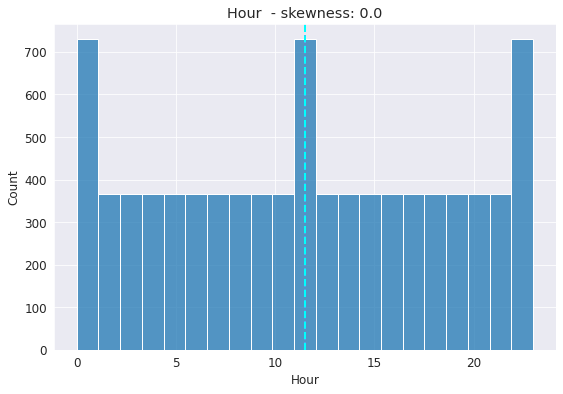

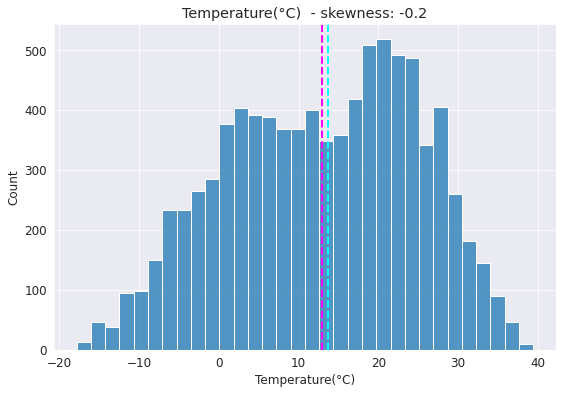

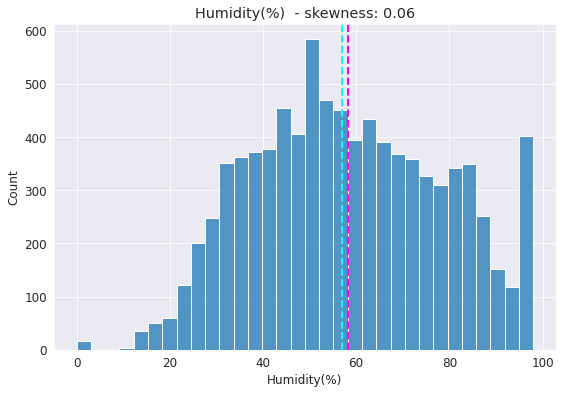

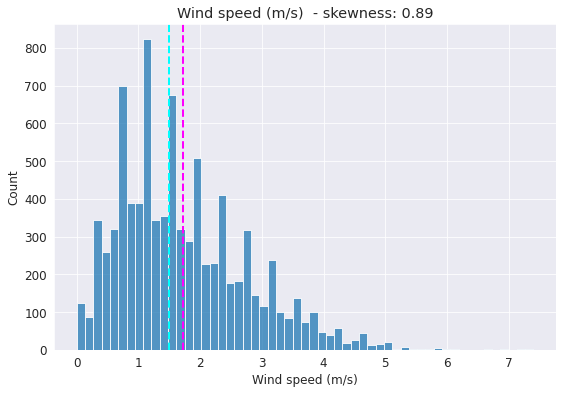

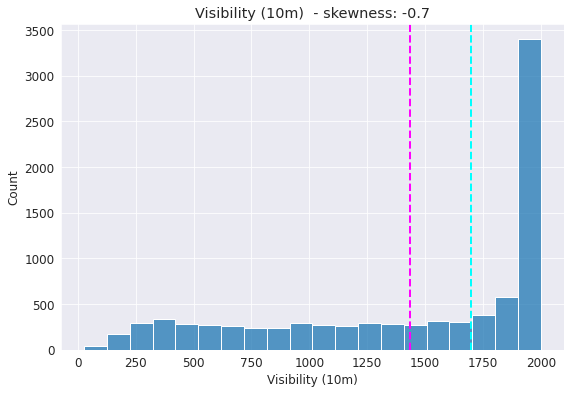

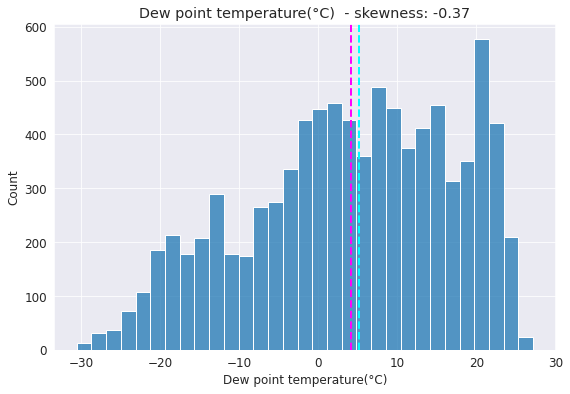

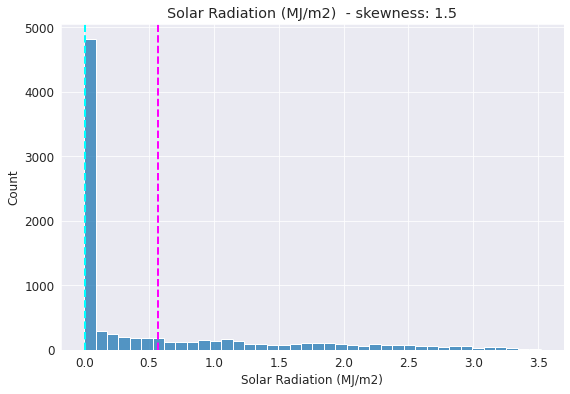

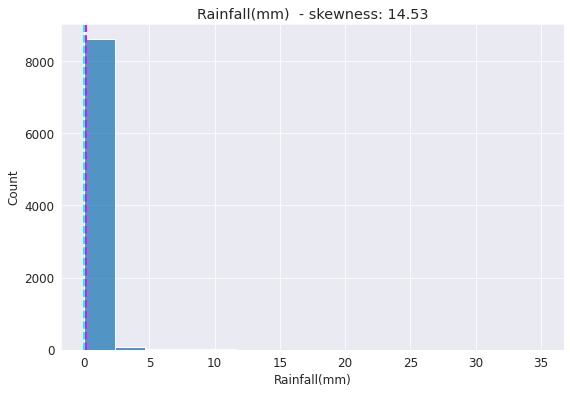

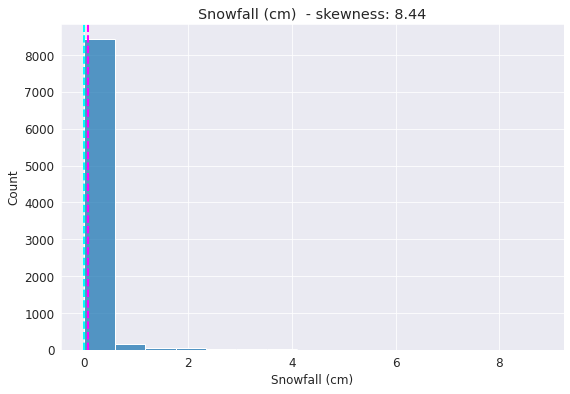

In [16]:
# Distribution of numeric_features

for col in numeric_features[1:]:
  fig = plt.figure(figsize = (9, 6))
  ax = fig.gca()
  feature = bike_df[col]
  sns.histplot(feature, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col + "  - skewness: " + str(round(feature.skew(), 2))) 

plt.show()

**From above distributions we can conclude the following:**

> **Hour, Humidity, Temperature and Dew point follows a normal distributions.**

> **Visibility follows a moderately  negative skewed distribution.**

> **Rainfall, Snowfall, Solar Radiation and Wind Speed follows a highly positive skewed distribution.**







**3. Categorical variables**

In [17]:
# Categorical features

categorical_features = bike_df.describe(include = "object").columns
categorical_features

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

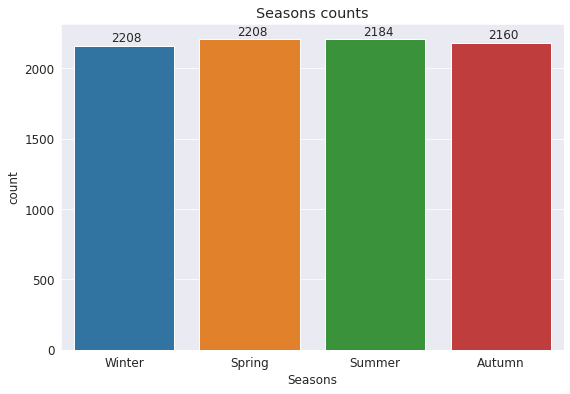

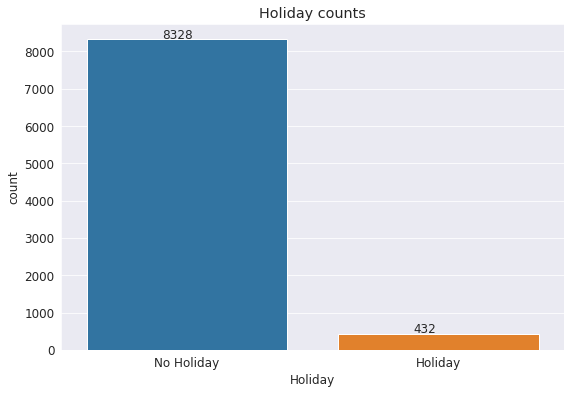

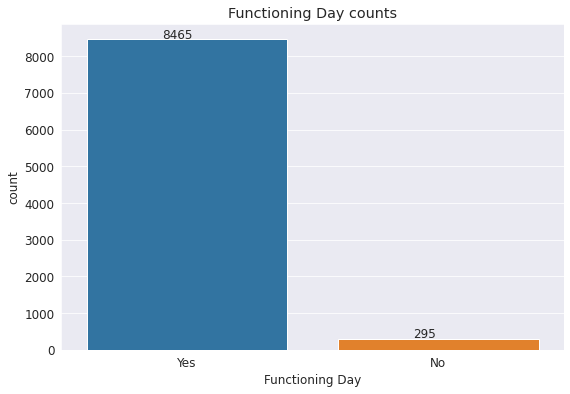

In [18]:
for col in categorical_features:
  fig = plt.figure(figsize = (9, 6))
  ax = fig.gca()
  feature = bike_df[col]
  ax = sns.countplot(x = feature)
  for p, label in zip(ax.patches, feature.value_counts().values):
    ax.annotate(label, (p.get_x()+0.300, p.get_height()+ 30))
  ax.set_title(col + " counts")

plt.show()

In [19]:
432  * 100/ len(bike_df)

4.931506849315069

**From the above visualizations we can conclude the following:**


> **There is equal representation of every season in the dataset.**

> **There is only 4.93% representation of holidays in the dataset.**

> **There is only 3.3% representation of Non functioning days in the dataset.**

## **Bivariate Analysis**

**1. Numerical variables vs Dependent Variable**

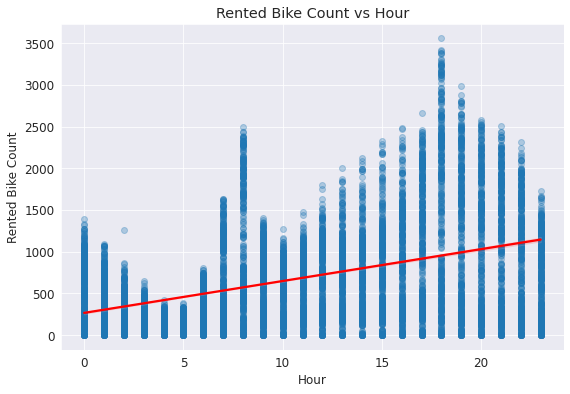

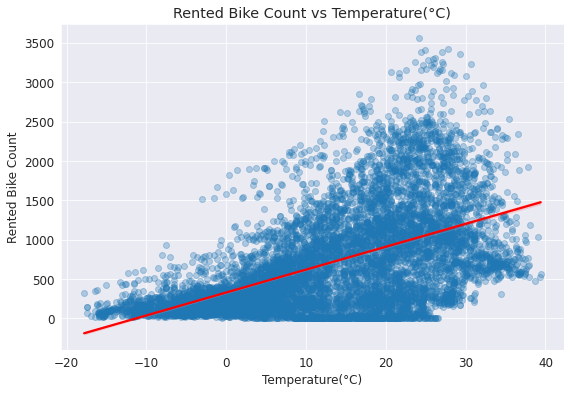

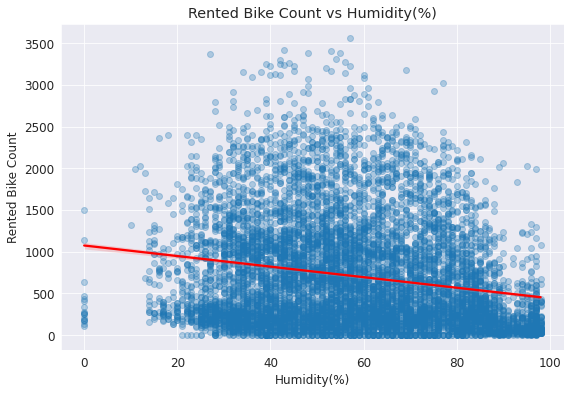

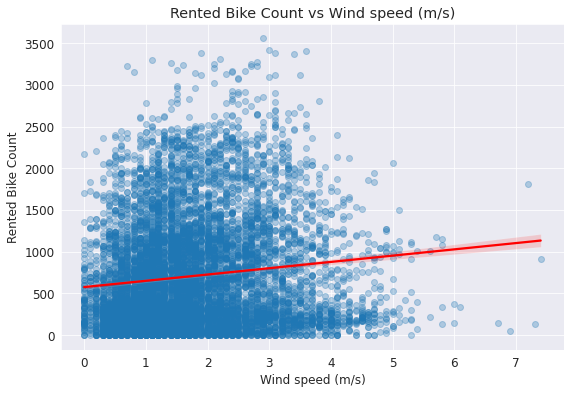

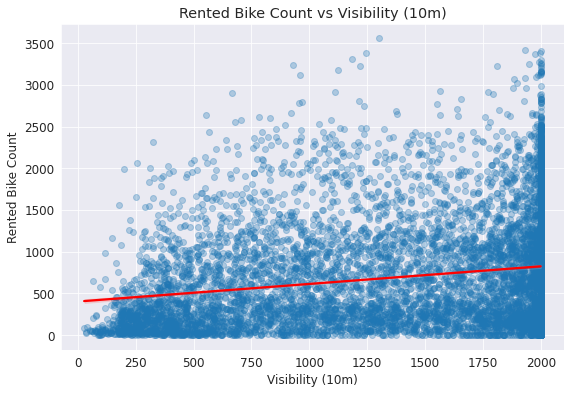

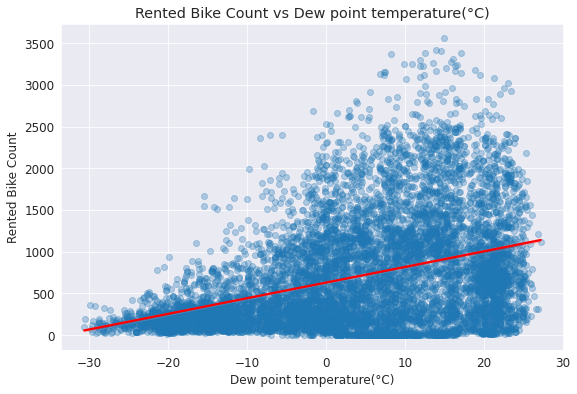

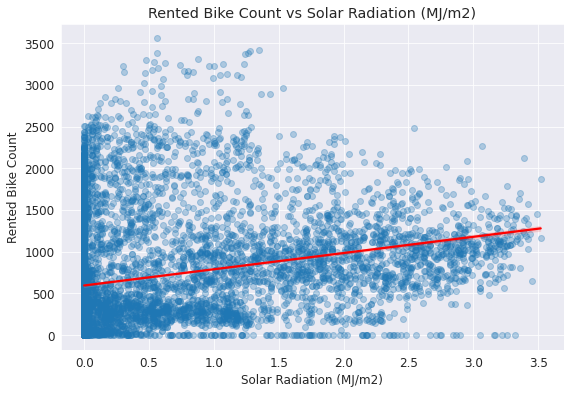

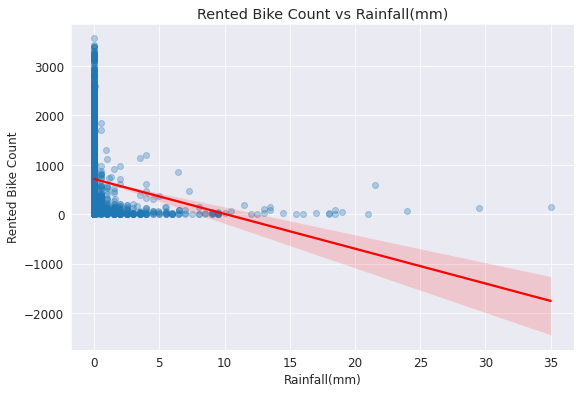

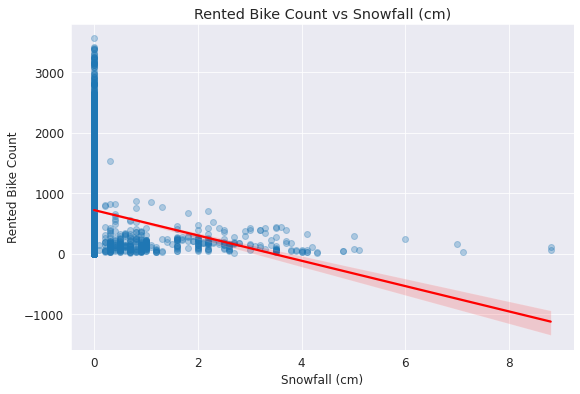

In [20]:
# Check for linear relationship between dependent and numerical independent variables

for col in numeric_features[1:]:
  fig = plt.figure(figsize = (9, 6))
  ax = fig.gca()
  feature = bike_df[col]
  label = bike_df["Rented Bike Count"]
  correlation = feature.corr(label)
  sns.regplot(x = feature, y = label, line_kws={"color": "red"}, scatter_kws={'alpha':0.3})
  ax.set_title("Rented Bike Count vs " + col)

plt.show()

**From the above visualizations we can conclude the following:**


> **Yet to conclude??**



**2. Categorical variables vs Dependent variable**



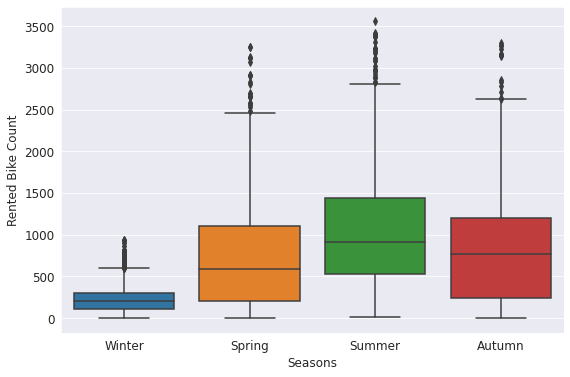

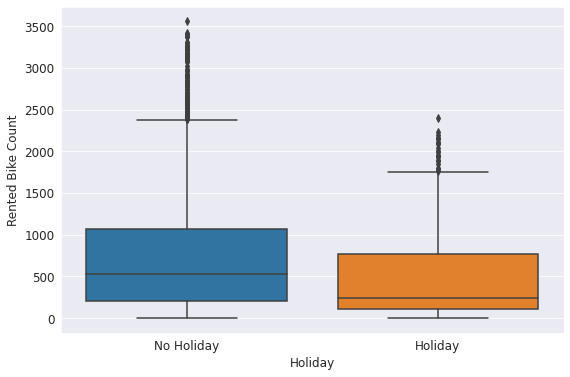

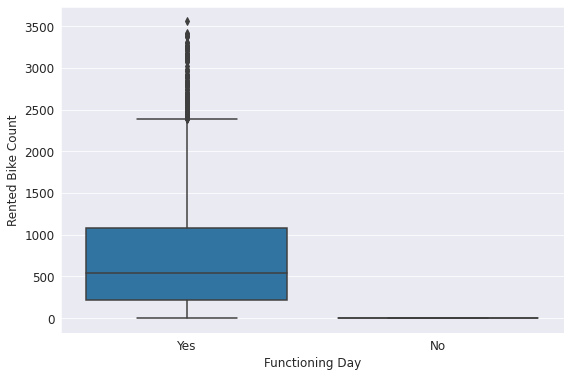

In [21]:
# Check for relation between rented bike count and categorical columns

for col in categorical_features:
  fig = plt.figure(figsize = (9, 6))
  ax = fig.gca()
  feature = bike_df[col]
  label = bike_df["Rented Bike Count"]
  sns.boxplot(x = feature, y = label)

plt.show()

**From the above visualizations following conclusions can be made:**


> **There is a high demand of bike in Summer and Autumn season while low demand in Winter seasons.**


> **The bike demand is very low on holidays.**


> **Bike demand is almost neglibile on non-functioning days.**







## **Multivariate Analysis**

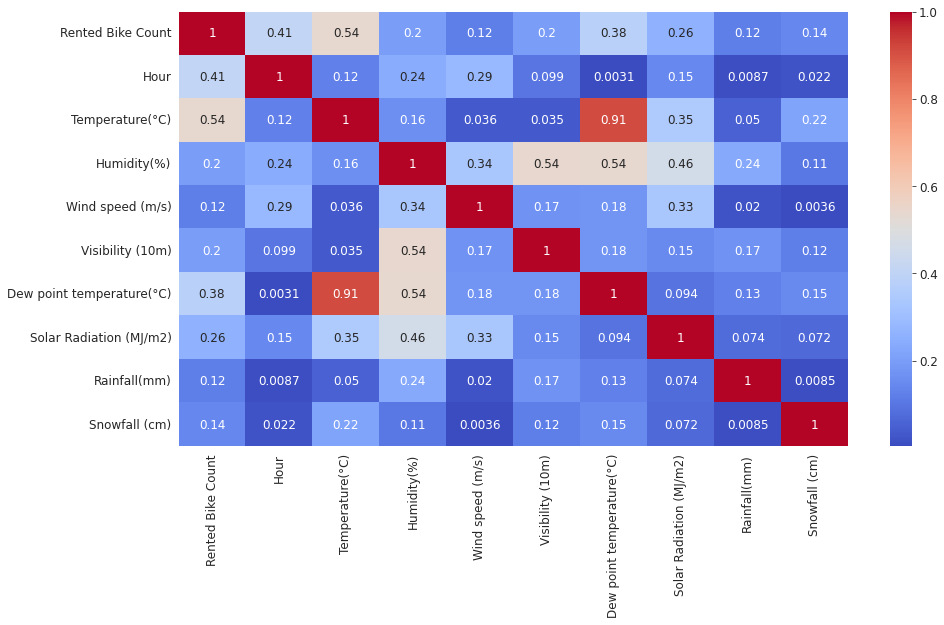

In [22]:
# Correlation matrix

plt.figure(figsize = (15, 8))
correlation = bike_df.corr()
sns.heatmap(abs(correlation), annot = True, cmap = "coolwarm")

plt.show()

**From the above visualization we can draw the following conclusions:**

> **It seems hour and temperature affect the demand of bikes.**


> **Multicollinearity is present in the data.**





# **Data Preparation**

**Transformations**

In [23]:
def data_transform(df):

  for col in df.describe().columns:

    if col in ["Rented Bike Count", "Wind speed (m/s)"]:
      df[col] = np.sqrt(df[col])
    
    elif col == "Visibility (10m)":
      df[col] = np.sqrt(np.max(df[col] + 1) - df[col])

    elif col in ["Snowfall (cm)", "Rainfall(mm)", "Solar Radiation (MJ/m2)"]:
      df[col] = np.log10(df[col] + 1)
    
  return df  

In [24]:
bike_df = data_transform(bike_df)

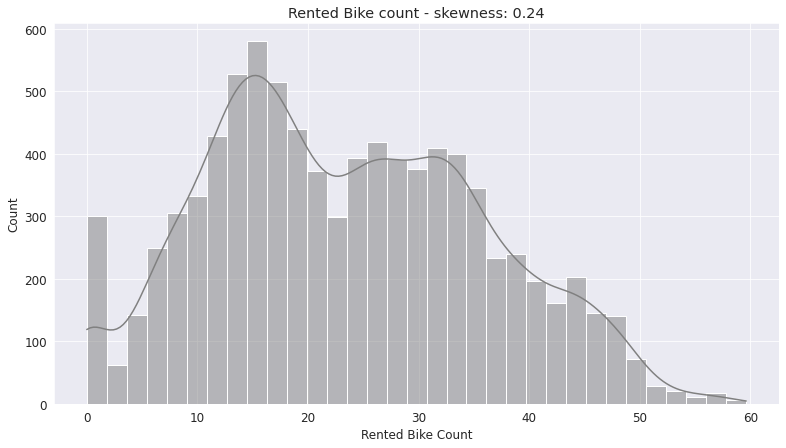

In [25]:
# Distribution of Dependent Variable after transformation

sns.histplot(bike_df["Rented Bike Count"], kde = "True", color = "grey")
plt.title("Rented Bike count - skewness: " + str(round(bike_df["Rented Bike Count"].skew(), 2))) 
plt.show()

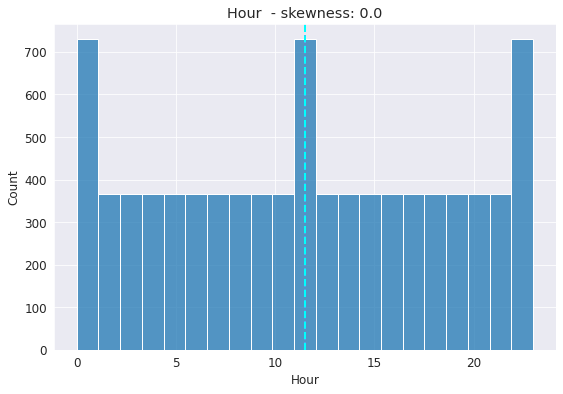

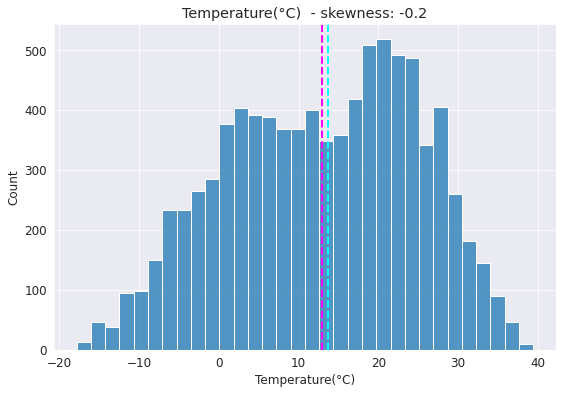

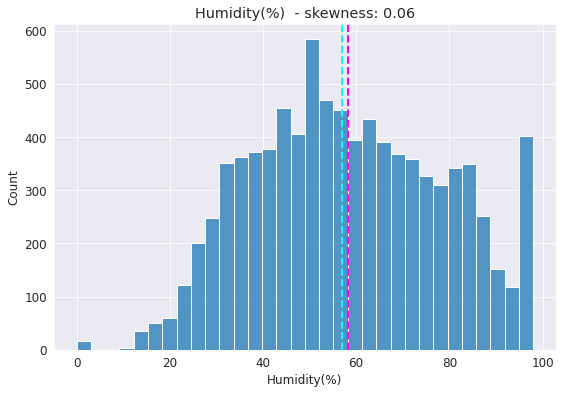

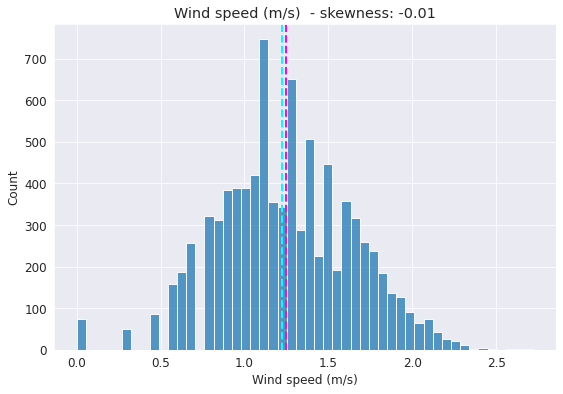

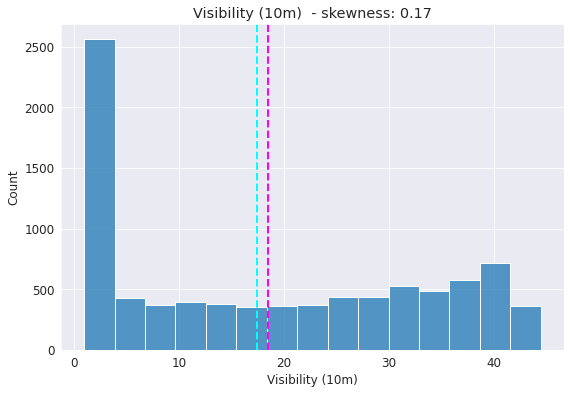

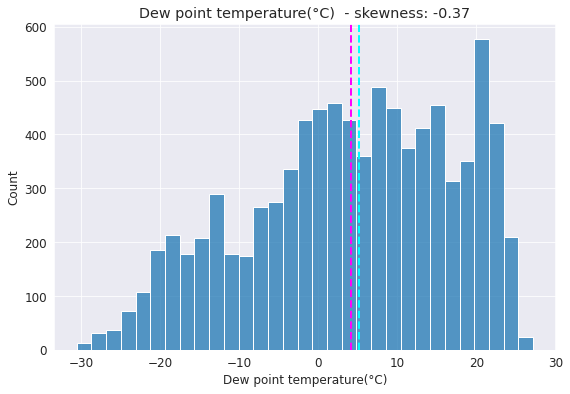

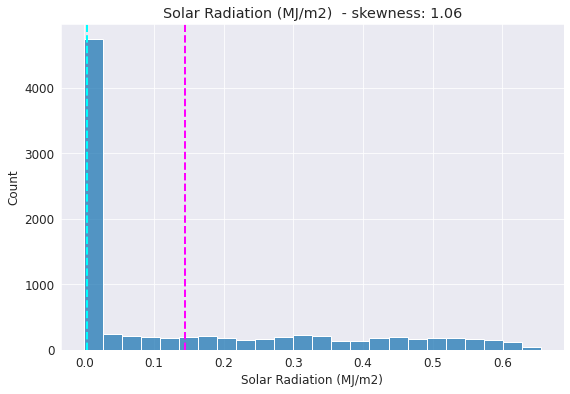

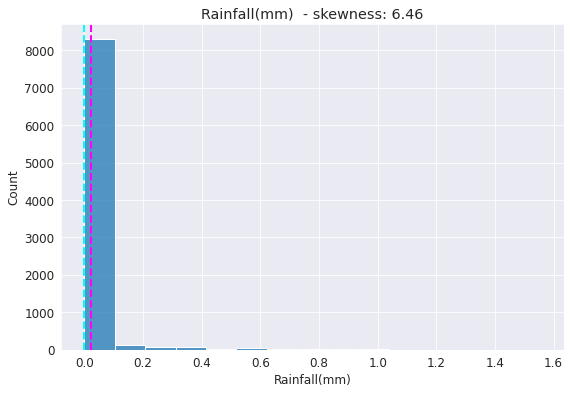

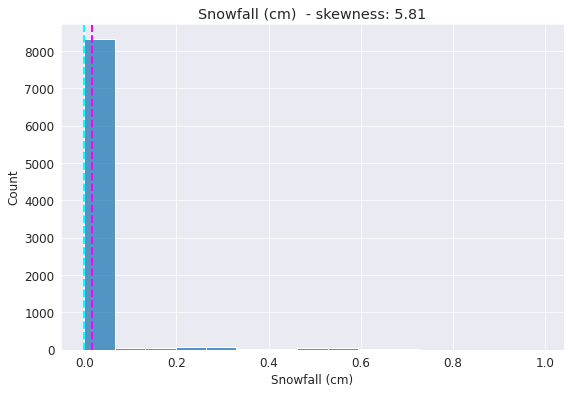

In [26]:
# Transforming distribution of skewed numeric_features

for col in numeric_features[1:]:
  fig = plt.figure(figsize = (9, 6))
  ax = fig.gca()
  feature = bike_df[col]
  sns.histplot(feature, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col + "  - skewness: " + str(round(feature.skew(), 2))) 

plt.show()

**Removing Multicollinearity**

In [27]:
# Using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
  '''
  Calculating VIF
  '''

  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return vif

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [28]:
cal_vif(bike_df[[i for i in bike_df.describe().columns if i not in ["Rented Bike Count", "Dew point temperature(°C)", "Wind speed (m/s)", "Visibility (10m)"]]])

,variables,VIF
0,Hour,2.981210
1,Temperature(°C),3.137108
2,Humidity(%),3.681757
3,Solar Radiation (MJ/m2),1.905611
4,Rainfall(mm),1.115165
5,Snowfall (cm),1.158487


In [29]:
numeric_features = cal_vif(bike_df[[i for i in bike_df.describe().columns if i not in ["Rented Bike Count", "Dew point temperature(°C)", "Wind speed (m/s)", "Visibility (10m)"]]])["variables"].values

In [30]:
numeric_features

array(['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype=object)

**Pearson Correlation**

In [31]:
from scipy import stats

In [32]:
num_features = []
for feature in numeric_features:
  pearson_coef, p_value = stats.pearsonr(bike_df[feature], bike_df["Rented Bike Count"])
  if abs(pearson_coef) >= 0.2 and p_value < 0.05:
    num_features.append(feature)

In [33]:
num_features

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)']

**ANOVA**

In [34]:
anova_df= bike_df[["Seasons", "Rented Bike Count"]].groupby(["Seasons"])
anova_df.head(2)

,Seasons,Rented Bike Count
0,Winter,15.937377
1,Winter,14.282857
2160,Spring,8.426150
2161,Spring,12.124356
4368,Summer,31.032241
4369,Summer,27.856777
6576,Autumn,32.787193
6577,Autumn,31.224990


In [35]:
# ANOVA
f_val, p_val = stats.f_oneway(anova_df.get_group("Winter")["Rented Bike Count"], anova_df.get_group("Spring")["Rented Bike Count"],
                              anova_df.get_group("Summer")["Rented Bike Count"], anova_df.get_group("Autumn")["Rented Bike Count"])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 800.8363425224286 , P = 0.0


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance.

**Two-sample t-test**

In [36]:
ttest_df1= bike_df[["Holiday", "Rented Bike Count"]].groupby(["Holiday"])
ttest_df1.head(2)

,Holiday,Rented Bike Count
0,No Holiday,15.937377
1,No Holiday,14.282857
504,Holiday,14.000000
505,Holiday,15.811388


In [37]:
# Test
t_val, p_val = stats.ttest_ind(ttest_df1.get_group("No Holiday")["Rented Bike Count"], ttest_df1.get_group("Holiday")["Rented Bike Count"])  
 
print( "T-test results: T=", t_val, ", P =", p_val)   

T-test results: T= 8.102620971126266 , P = 6.101854980659526e-16


In [38]:
ttest_df2= bike_df[["Functioning Day", "Rented Bike Count"]].groupby(["Functioning Day"])
ttest_df2.head(2)

,Functioning Day,Rented Bike Count
0,Yes,15.937377
1,Yes,14.282857
3144,No,0.000000
3145,No,0.000000


In [39]:
# T Test
t_val, p_val = stats.ttest_ind(ttest_df2.get_group("Yes")["Rented Bike Count"], ttest_df2.get_group("No")["Rented Bike Count"])  

print( "ANOVA results: T=", t_val, ", P =", p_val)   

ANOVA results: T= 35.138283098630865 , P = 3.670085097506617e-253


**All three categorical features are important.**

In [40]:
sel_features = []
sel_features.extend(["Rented Bike Count"])
sel_features.extend(num_features)
sel_features.extend(categorical_features)

In [41]:
sel_bike_df = bike_df[sel_features]
sel_bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Solar Radiation (MJ/m2),Rainfall(mm),Seasons,Holiday,Functioning Day
0,15.937377,0,-5.2,37,0.0,0.0,Winter,No Holiday,Yes
1,14.282857,1,-5.5,38,0.0,0.0,Winter,No Holiday,Yes
2,13.152946,2,-6.0,39,0.0,0.0,Winter,No Holiday,Yes
3,10.344080,3,-6.2,40,0.0,0.0,Winter,No Holiday,Yes
4,8.831761,4,-6.0,36,0.0,0.0,Winter,No Holiday,Yes


## **Preparing the data for Machine Learning Algorithm**

**1. On selected features**

In [43]:
# Random Sampling

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(sel_bike_df, test_size = 0.2, random_state = 42)

In [48]:
bike_count = train_set["Rented Bike Count"].copy()
features = train_set.drop("Rented Bike Count", axis = 1)

In [54]:
cat_cols = features.describe(include=['O']).columns
cat_features = features[cat_cols]
cat_features.head()

,Seasons,Holiday,Functioning Day
8415,Autumn,No Holiday,Yes
5049,Summer,No Holiday,Yes
8395,Autumn,No Holiday,Yes
1535,Winter,No Holiday,Yes
5518,Summer,No Holiday,Yes


In [55]:
num_cols = features.describe().columns
num_features = features[num_cols]
num_features.head()

,Hour,Temperature(°C),Humidity(%),Solar Radiation (MJ/m2),Rainfall(mm)
8415,15,13.2,61,0.307496,0.0
5049,9,22.9,86,0.245513,0.0
8395,19,11.2,46,0.000000,0.0
1535,23,-2.6,69,0.000000,0.0
5518,22,27.2,73,0.000000,0.0


In [56]:
''' Using Column Transformer to create a pipeline to use StandardScaler to perform feature scaling on num features and also
converting categorical features into numerical features using OneHot Encoder'''

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

features_pipeline = ColumnTransformer([
                                       ("std_scaler", StandardScaler(), num_cols),
                                       ("encoding", OneHotEncoder(), cat_cols)
])

data_prepared = features_pipeline.fit_transform(features)

In [57]:
data_prepared

array([[ 0.50542093,  0.02237011,  0.13701177, ...,  1.        ,
         0.        ,  1.        ],
       [-0.36356579,  0.83822207,  1.35998213, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.08474541, -0.14584679, -0.59677044, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.36058981,  1.39333784,  0.18593058, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.22957653, -1.37383015, -0.35217637, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.51923877,  0.53543165, -0.15650112, ...,  1.        ,
         0.        ,  1.        ]])

In [58]:
data_prepared.shape

(7008, 13)

In [59]:
bike_count.shape

(7008,)

# **Modelling**

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score


In [82]:
def train_models(models_dict, data_prepared, label_prepared):

  train_models = dict()
  for model in models_dict:
    train_models[model] = models_dict[model].fit(data_prepared, label_prepared)

  return train_models

In [91]:
from numpy.core.fromnumeric import mean
def evaluate_models(models_dict, data_prepared, label_prepared, cross_val = False):
  
  scores_dict = dict()

  if cross_val:

    for model in models_dict:
      model_scores = cross_val_score(models_dict[model], data_prepared, 
                                     label_prepared, scoring = ("r2"), cv = 10)
      scores_dict[model] = mean(model_scores)

  else:

    for model in models_dict:
      bike_count_pred = models_dict[model].predict(data_prepared)
      scores_dict[model] = r2_score(label_prepared, bike_count_pred)

  return scores_dict

In [87]:
# Model training

models_dict = {"LR": LinearRegression(), "KNN": KNeighborsRegressor(),
               "DT": DecisionTreeRegressor(), "RF": RandomForestRegressor()}
trained_models = train_models(models_dict, data_prepared, bike_count)

In [93]:
# Model evaluation on train-set

evaluate_models(models_dict, data_prepared, bike_count)

{'DT': 0.9999902521728037,
 'KNN': 0.9155723336171463,
 'LR': 0.6753877965189319,
 'RF': 0.9853827627655533}

In [92]:
# Model evaluation on cross validation 

evaluate_models(models_dict, data_prepared, bike_count, cross_val = True)

{'DT': 0.8084168197147775,
 'KNN': 0.8648465108353296,
 'LR': 0.673694100288038,
 'RF': 0.8939226658380459}